Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the automobile dataset, complete the steps outlined in this notebook by writing code in the cells.

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns

import missingno as msno

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the movies dataset
automobiles_df = pd.read_csv('automobile.txt')

# Display the first few rows of the dataset
display(automobiles_df.head())

# Display the last few rows of the dataset
display(automobiles_df.tail())

# Display the shape of the dataset
display(automobiles_df.shape)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


(205, 26)

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['normalized-losses', 'symboling']` from the data set as they will not be used in the analysis.

In [ ]:
# Remove "normalized-losses" and "symboling" columns
automobiles_df = automobiles_df.drop(columns=['normalized-losses', 'symboling'])

# Check to see if columns were dropped
display(automobiles_df.head())

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Remove any duplicate rows

In [ ]:
# Check for duplicated rows
display(automobiles_df.duplicated().sum())

np.int64(0)

#### Remove rows with missing data

Some automobiles in the database have missing values which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [ ]:
# Check for question marks
display((automobiles_df == '?').sum())


make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

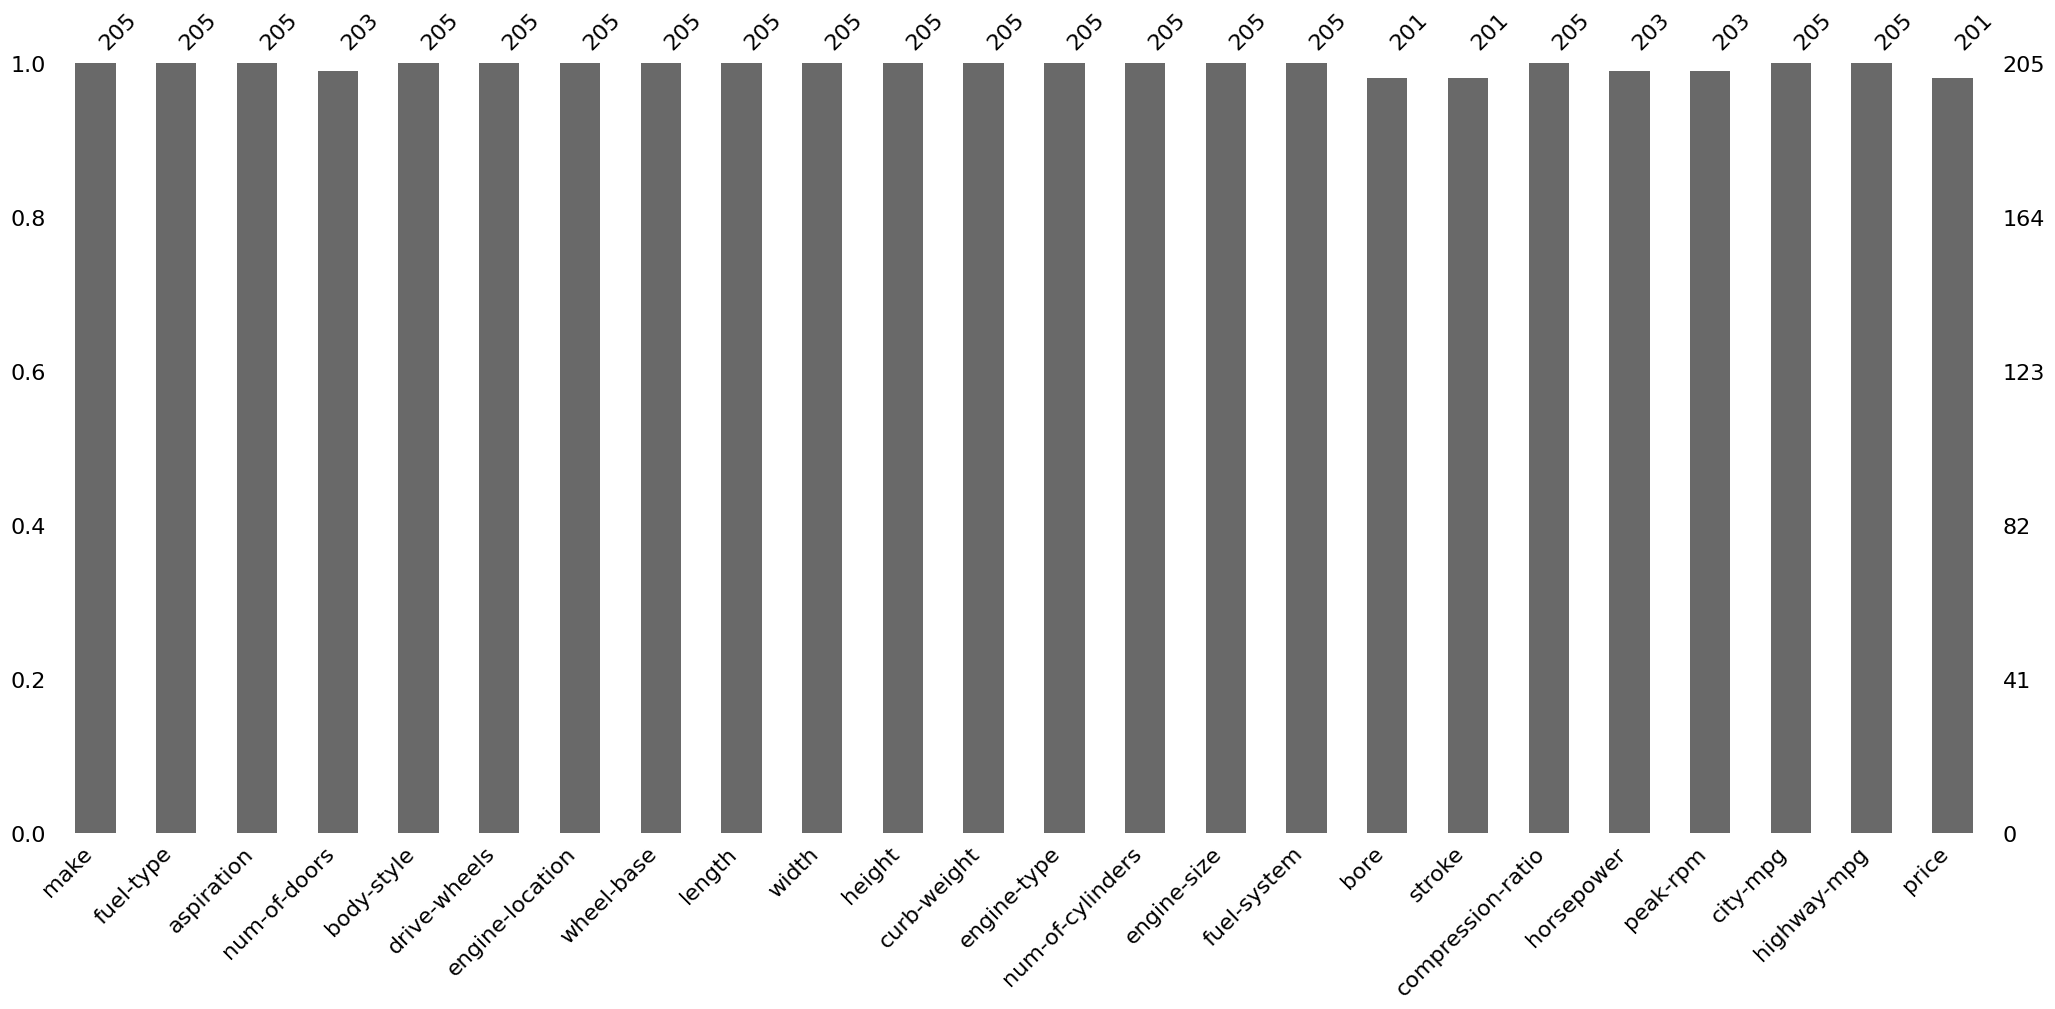

In [ ]:
# Convert '?' to Nan values
automobiles_df.replace('?', np.nan, inplace=True)

# Check for Nan values
display(automobiles_df.isnull().sum())

# Plot bar graph
msno.bar(automobiles_df)
plt.show()

make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

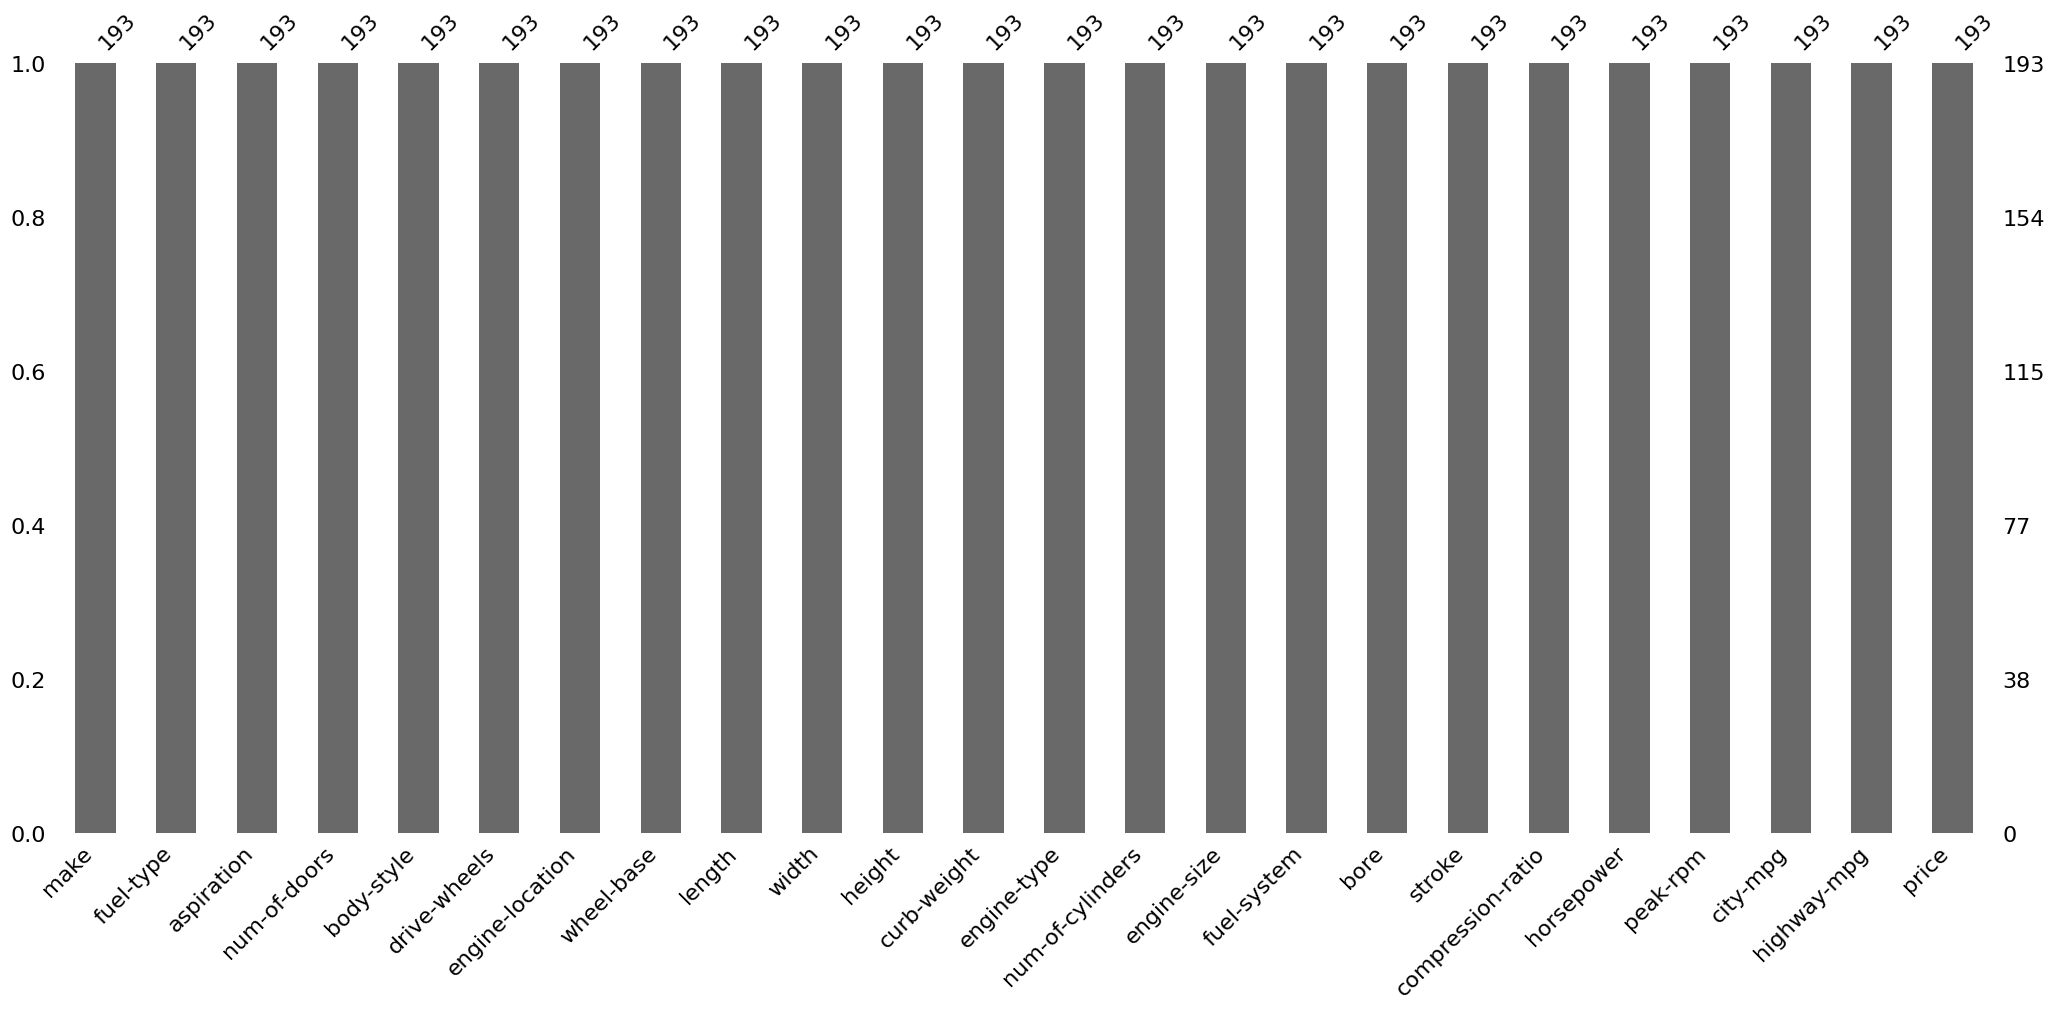

In [ ]:
# Drop rows with missing values
automobiles_df.dropna(inplace=True)

# Check for missing values
display(automobiles_df.isnull().sum())

# Plot bar graph
msno.bar(automobiles_df)
plt.show()

Change columns with numerical data column to an integer data type using numpy’s `int64` method.

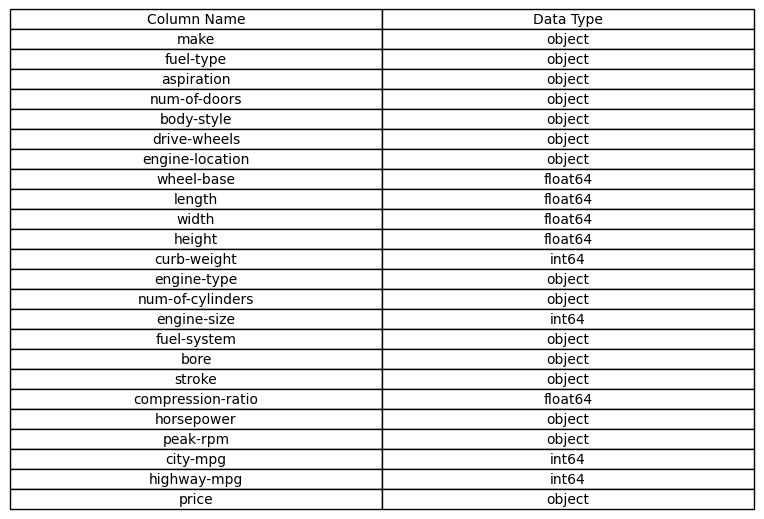

In [ ]:
# Check current datatypes
dtype_table= pd.DataFrame({
    'Column Name': automobiles_df.columns,
    'Data Type': automobiles_df.dtypes.astype(str)
})

# Plot table
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')

table = ax.table(
    cellText=dtype_table.values,
    colLabels=dtype_table.columns,
    cellLoc='center',
    loc='center'
)

table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.show()

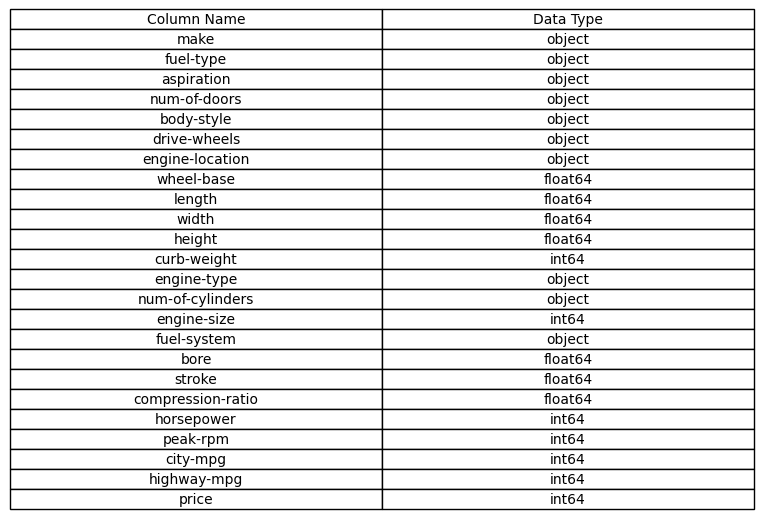

In [ ]:
# Convert integer data type to int64
automobiles_df['bore'] = automobiles_df['bore'].astype('float64')
automobiles_df['stroke'] = automobiles_df['stroke'].astype('float64')
automobiles_df['horsepower'] = automobiles_df['horsepower'].astype('int64')
automobiles_df['peak-rpm'] = automobiles_df['peak-rpm'].astype('int64')
automobiles_df['price'] = automobiles_df['price'].astype('int64')

# Check current datatypes
dtype_table= pd.DataFrame({
    'Column Name': automobiles_df.columns,
    'Data Type': automobiles_df.dtypes.astype(str)
})

# Plot table
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')

table = ax.table(
    cellText=dtype_table.values,
    colLabels=dtype_table.columns,
    cellLoc='center',
    loc='center'
)

table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.show()


### Finding Certain Categories
Locate all automobiles in the "hatchback" genre.

In [ ]:
# Create a dataframe with all the cars in the "hatchback' category
hatchback_cars = automobiles_df[automobiles_df['body-style']=='hatchback']
display(hatchback_cars)

# Create a dataframe with all the cars in the "convertible' category
convertible_cars = automobiles_df[automobiles_df['body-style']=='convertible']
display(convertible_cars)

# Create a dataframe with all the cars in the "sedan' category
sedan_cars = automobiles_df[automobiles_df['body-style']=='sedan']
display(sedan_cars)

# Create a dataframe with all the cars in the "wagon' category
wagon_cars = automobiles_df[automobiles_df['body-style']=='wagon']
display(wagon_cars)

# Create a dataframe with all the cars in the "hardtop' category
hardtop_cars = automobiles_df[automobiles_df['body-style']=='hardtop']
display(hardtop_cars)


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
18,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,...,61,2bbl,2.91,3.03,9.50,48,5100,47,53,5151
19,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,...,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6295
21,dodge,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,...,90,2bbl,2.97,3.23,9.41,68,5500,37,41,5572
22,dodge,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,...,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,toyota,gas,std,four,hatchback,fwd,front,102.4,175.6,66.5,...,122,mpfi,3.31,3.54,8.70,92,4200,27,32,9988
177,toyota,gas,std,four,hatchback,fwd,front,102.4,175.6,66.5,...,122,mpfi,3.31,3.54,8.70,92,4200,27,32,11248
178,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,...,171,mpfi,3.27,3.35,9.30,161,5200,20,24,16558
179,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,...,171,mpfi,3.27,3.35,9.30,161,5200,19,24,15998


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
72,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056
128,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028
172,toyota,gas,std,two,convertible,rwd,front,98.4,176.2,65.6,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,17669
189,volkswagen,gas,std,two,convertible,fwd,front,94.5,159.3,64.2,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
28,dodge,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,...,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921
36,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,92,1bbl,2.92,3.41,9.2,76,6000,30,34,7295
68,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
93,nissan,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7349
97,nissan,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999
102,nissan,gas,std,four,wagon,fwd,front,100.4,184.6,66.5,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
109,peugot,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440
110,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,...,152,idi,3.70,3.52,21.0,95,4150,25,25,13860
113,peugot,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
69,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176
74,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400
98,nissan,gas,std,two,hardtop,fwd,front,95.1,162.4,63.8,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,8249
126,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528
127,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028
167,toyota,gas,std,two,hardtop,rwd,front,98.4,176.2,65.6,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,8449
168,toyota,gas,std,two,hardtop,rwd,front,98.4,176.2,65.6,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9639
170,toyota,gas,std,two,hardtop,rwd,front,98.4,176.2,65.6,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,11199


body-style
sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_2992\2327155986.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


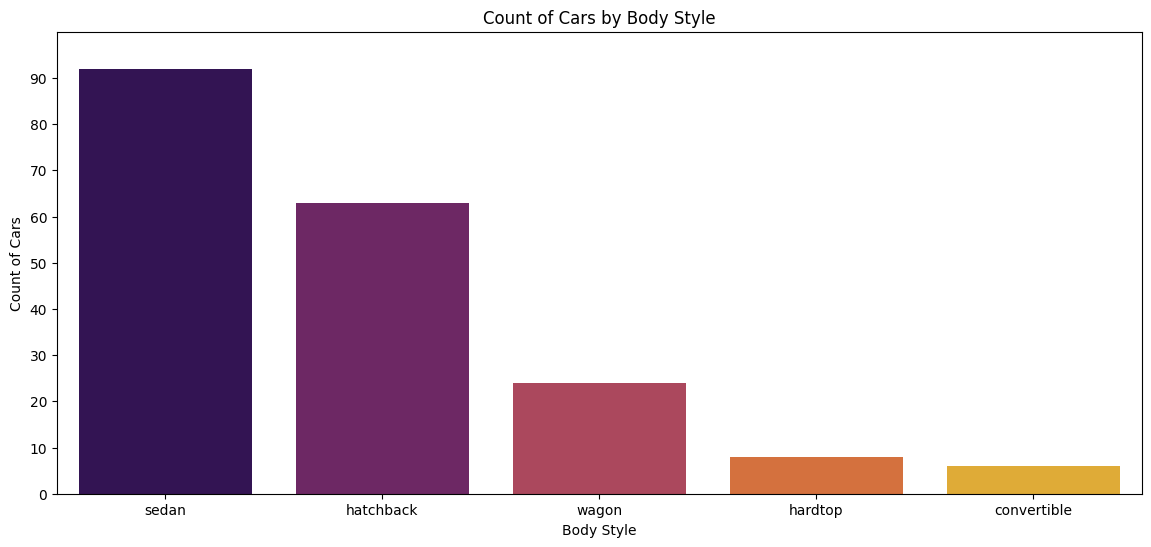

In [ ]:
body_style_counts = automobiles_df['body-style'].value_counts().sort_values(ascending=False)
print(body_style_counts)

# Plot bar graph
plt.figure(figsize=(14, 6))
sns.barplot(
    x=body_style_counts.index, 
    y=body_style_counts.values, 
    palette='inferno')

plt.title('Count of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count of Cars')
plt.ylim(0, 100)
plt.yticks(range(0, 100, 10))
plt.show()

In [ ]:
# Explore the 'price' column.
display(automobiles_df['price'].unique())
display(automobiles_df['price'].max())
display(automobiles_df['price'].min())

array([13495, 16500, 13950, 17450, 15250, 17710, 18920, 23875, 16430,
       16925, 20970, 21105, 24565, 30760, 41315, 36880,  5151,  6295,
        6575,  5572,  6377,  7957,  6229,  6692,  7609,  8921, 12964,
        6479,  6855,  5399,  6529,  7129,  7295,  7895,  9095,  8845,
       10295, 12945, 10345,  6785, 11048, 32250, 35550, 36000,  5195,
        6095,  6795,  6695,  7395,  8495, 10595, 10245, 11245, 18280,
       18344, 25552, 28248, 28176, 31600, 34184, 35056, 40960, 45400,
       16503,  5389,  6189,  6669,  7689,  9959,  8499, 12629, 14869,
       14489,  6989,  8189,  9279,  5499,  7099,  6649,  6849,  7349,
        7299,  7799,  7499,  7999,  8249,  8949,  9549, 13499, 14399,
       17199, 19699, 18399, 11900, 13200, 12440, 13860, 15580, 16900,
       16695, 17075, 16630, 17950, 18150, 12764, 22018, 32528, 34028,
       37028, 11850, 12170, 15040, 15510, 18620,  5118,  7053,  7603,
        7126,  7775,  9960,  9233, 11259,  7463, 10198,  8013, 11694,
        5348,  6338,

np.int64(45400)

np.int64(5118)

In [ ]:
# Explore the 'aspiration' column.
display(automobiles_df['aspiration'].unique())

array(['std', 'turbo'], dtype=object)

In [ ]:
# Explore the 'make' column.
display(automobiles_df['make'].unique())

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
# Correct spelling error in 'alfa-romero'
automobiles_df['make'] = automobiles_df['make'].replace('alfa-romero', 'alfa-romeo')

# Correct spelling error in 'peugot'
automobiles_df['make'] = automobiles_df['make'].replace('peugot', 'peugeot')

# Display changes
display(automobiles_df['make'].unique())

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
# Explore the 'body-style' column.
display(automobiles_df['body-style'].unique())

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
# Explore the 'engine-location' column.
display(automobiles_df['engine-type'].unique())

array(['dohc', 'ohcv', 'ohc', 'l', 'ohcf'], dtype=object)

In [ ]:
# Explore the 'num-of-cylinders' column.
display(automobiles_df['num-of-cylinders'].unique())

array(['four', 'six', 'five', 'three', 'twelve', 'eight'], dtype=object)

In [ ]:
# Explore the 'fuel-system' column.
display(automobiles_df['fuel-system'].unique())

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', 'idi', 'spdi'], dtype=object)

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive cars?

How do the most expensive and cheapest cars compare? Exploring the most expensive cars highlights if some cars are worth the money spent on them based on their fuel economy (mpg or miles per gallon)

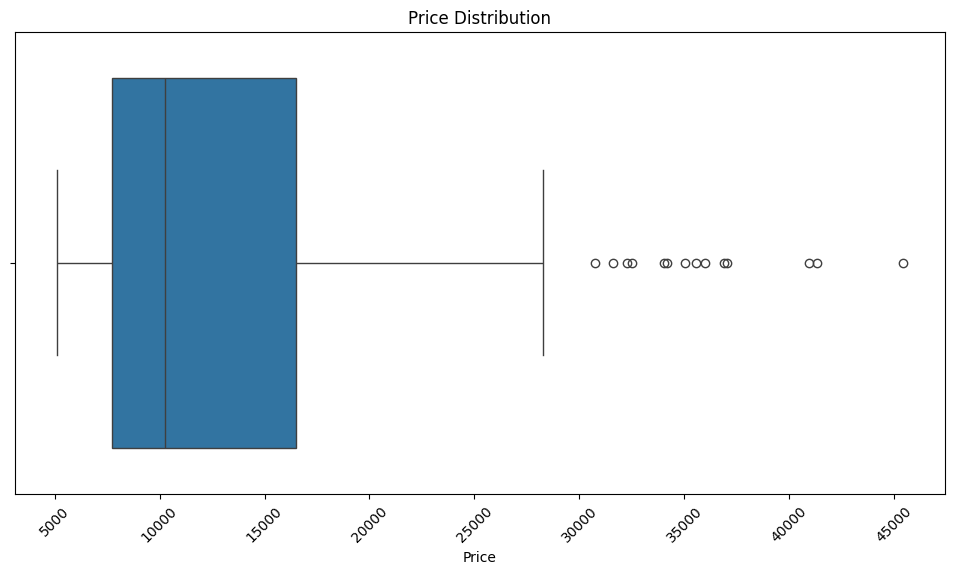

In [ ]:
# Explore the prices using a box plot
plt.figure(figsize=(12,6))
sns.boxplot(x='price', data=automobiles_df)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.xticks(rotation=45)
plt.show()

Expensive Cars:


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Category
74,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,...,mpfi,3.80,3.35,8.0,184,4500,14,16,45400,Most Expensive
16,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315,Most Expensive
73,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960,Most Expensive
128,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,...,mpfi,3.74,2.90,9.5,207,5900,17,25,37028,Most Expensive
17,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,...,mpfi,3.62,3.39,8.0,182,5400,15,20,36880,Most Expensive
49,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,...,mpfi,3.54,2.76,11.5,262,5000,13,17,36000,Most Expensive
48,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,35550,Most Expensive
72,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,...,mpfi,3.46,3.10,8.3,155,4750,16,18,35056,Most Expensive
71,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,...,mpfi,3.46,3.10,8.3,155,4750,16,18,34184,Most Expensive
127,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,...,mpfi,3.74,2.90,9.5,207,5900,17,25,34028,Most Expensive


Cheap Cars:


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Category
138,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,...,2bbl,3.62,2.36,9.0,69,4900,31,36,5118,Cheapest
18,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,...,2bbl,2.91,3.03,9.5,48,5100,47,53,5151,Cheapest
50,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,...,2bbl,3.03,3.15,9.0,68,5000,30,31,5195,Cheapest
150,toyota,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,...,2bbl,3.05,3.03,9.0,62,4800,35,39,5348,Cheapest
76,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,...,2bbl,2.97,3.23,9.4,68,5500,37,41,5389,Cheapest


C:\Users\User\AppData\Local\Temp\ipykernel_2992\272737968.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


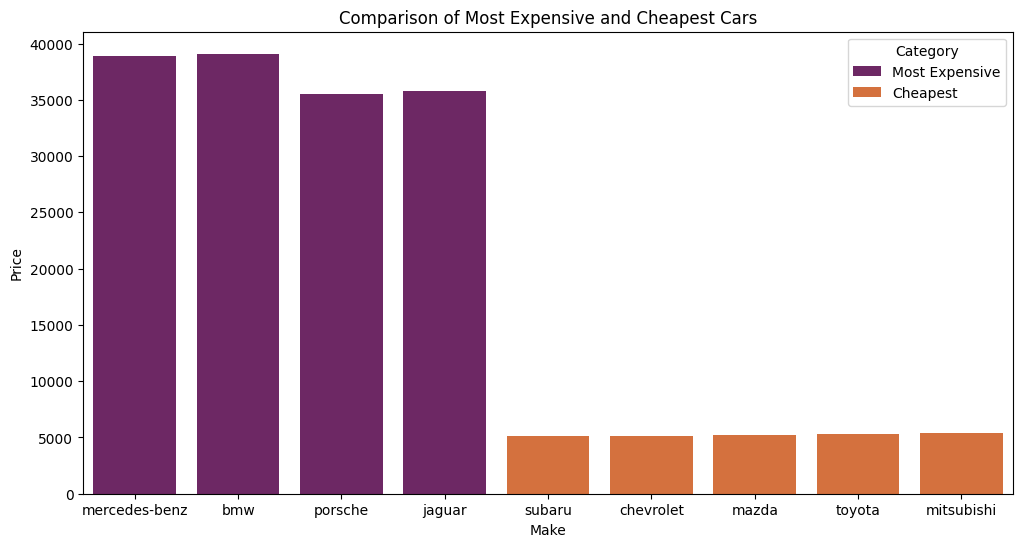

In [ ]:
# Find the five most expensive cars
most_expensive_cars = automobiles_df.sort_values(by='price', ascending=False).head(10)
most_expensive_cars['Category'] = 'Most Expensive'
print('Expensive Cars:')
display(most_expensive_cars)

# Find the five cheapest cars
cheap_cars = automobiles_df.sort_values(by='price', ascending=True).head(5)
cheap_cars['Category'] = 'Cheapest'
print('Cheap Cars:')
display(cheap_cars)

# Combine the Dataframes
combined_cars = pd.concat([most_expensive_cars, cheap_cars])

# Plot a barplot 
plt.figure(figsize=(12,6))
sns.barplot(
    x='make',
    y='price',
    hue='Category',
    data=combined_cars,
    palette='inferno',
    ci=None
)

plt.title('Comparison of Most Expensive and Cheapest Cars')
plt.xlabel('Make')
plt.ylabel('Price')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2992\199728622.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


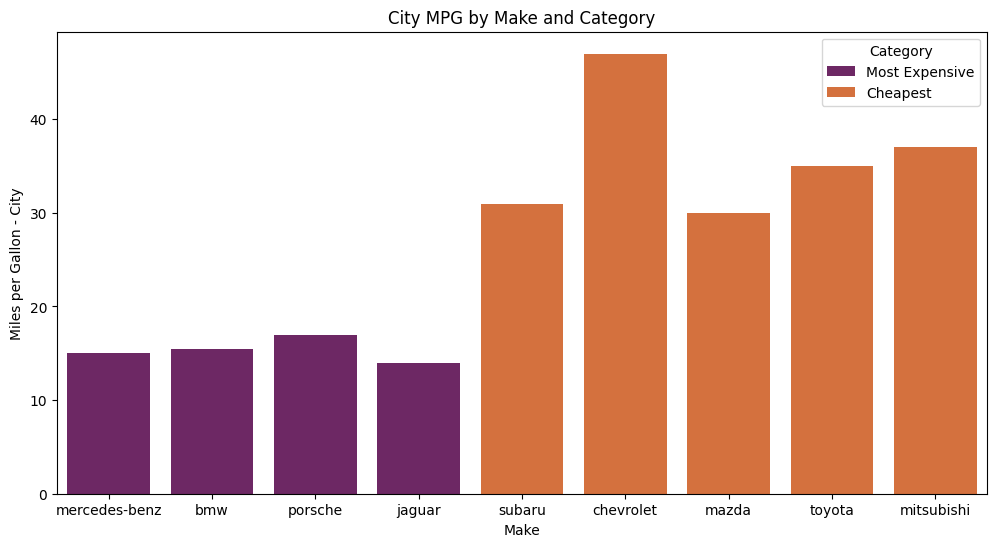

In [ ]:
# Plot barplot for City MPG vs. Category
plt.figure(figsize=(12,6))
sns.barplot(
    x='make',
    y='city-mpg',
    hue='Category',
    palette='inferno',
    data=combined_cars,
    ci=None,
)

plt.title('City MPG by Make and Category')
plt.xlabel('Make')
plt.ylabel('Miles per Gallon - City')
plt.show()

In [ ]:
# One-hot encode body-style
df_copy = automobiles_df.copy()

# One-hot encode body-style
df_copy = pd.get_dummies(df_copy, columns=['body-style'])

# One-hot encode make
df_copy = pd.get_dummies(df_copy, columns=['make'])

# One-hot encode fuel-type
df_copy = pd.get_dummies(df_copy, columns=['fuel-type'])

# One-hot encode aspiration
df_copy = pd.get_dummies(df_copy, columns=['aspiration'])

# One-hot encode number-of-cylinders
df_copy = pd.get_dummies(df_copy, columns=['num-of-cylinders'])


print(df_copy.columns)



Index(['num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'engine-type',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'make_alfa-romeo', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugeot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel-type_diesel', 'fuel-type_gas',
       'aspiration_std', 'aspiration_turbo', 'num-of-cylinders_eight',
       'num-of-cylinders_five', 'num-of-cylinders_four',
       'num-of-cylinders_six', 'num-of-cylinders_three',
    

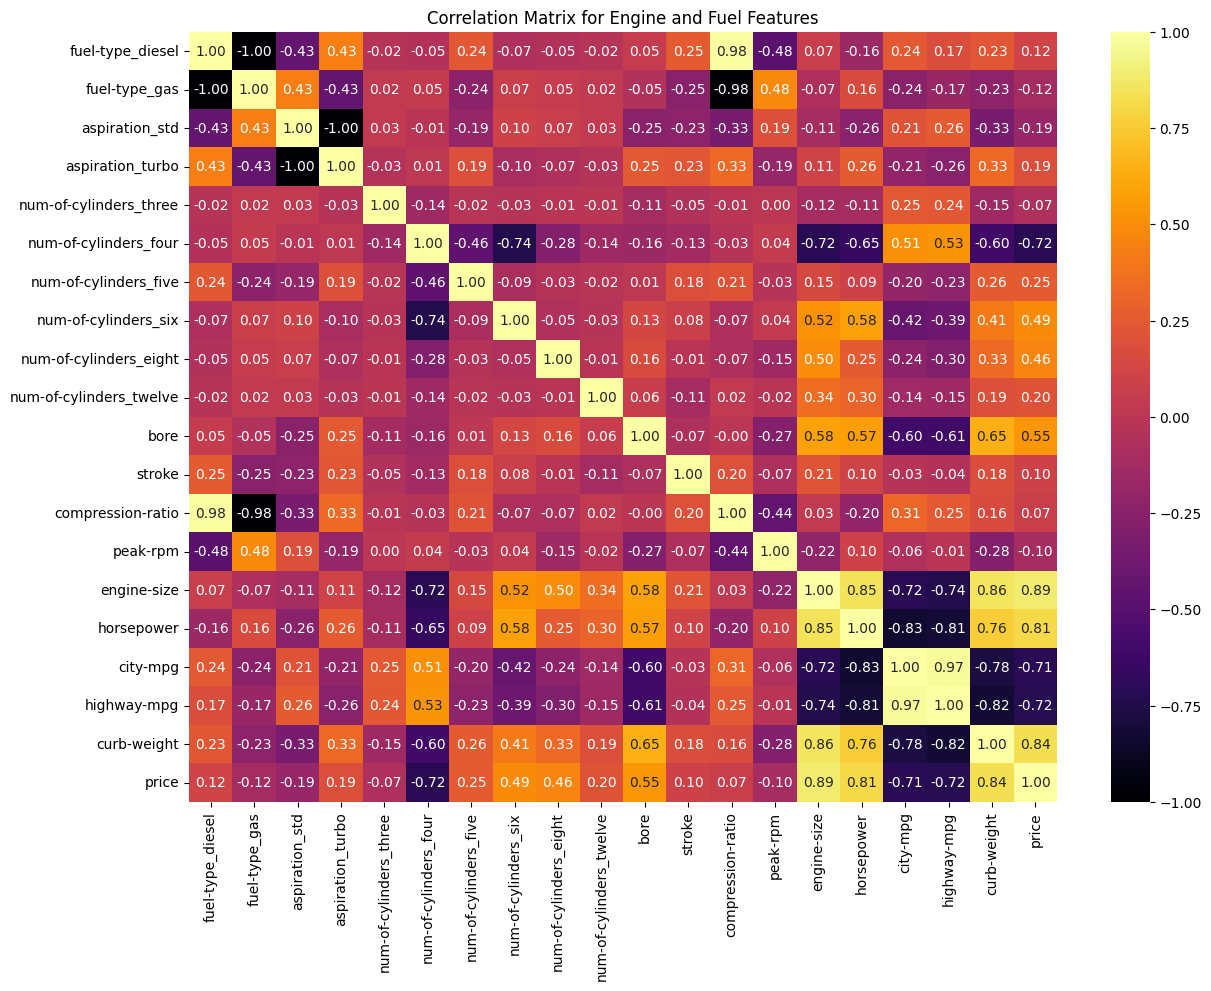

In [ ]:
# Plot correlation matrix

# Engine and fuel categories
engine_fuel_cols = [
    'fuel-type_diesel',
    'fuel-type_gas',
    'aspiration_std',
    'aspiration_turbo',
    'engine-type',
    'num-of-cylinders_three',
    'num-of-cylinders_four',
    'num-of-cylinders_five',
    'num-of-cylinders_six',
    'num-of-cylinders_eight',
    'num-of-cylinders_twelve',
    'fuel-system',
    'bore',
    'stroke',
    'compression-ratio',
    'engine-location',
    'peak-rpm',
    'engine-size',
    'horsepower',
    'city-mpg',
    'highway-mpg',
    'curb-weight',
    'price'
]

df_corr_engine_fuel = df_copy[engine_fuel_cols]

plt.figure(figsize=(14,10))

sns.heatmap(
    df_corr_engine_fuel.corr(numeric_only=True),
    annot=True,
    cmap='inferno',
    fmt='.2f',
)

plt.title('Correlation Matrix for Engine and Fuel Features')
plt.show()



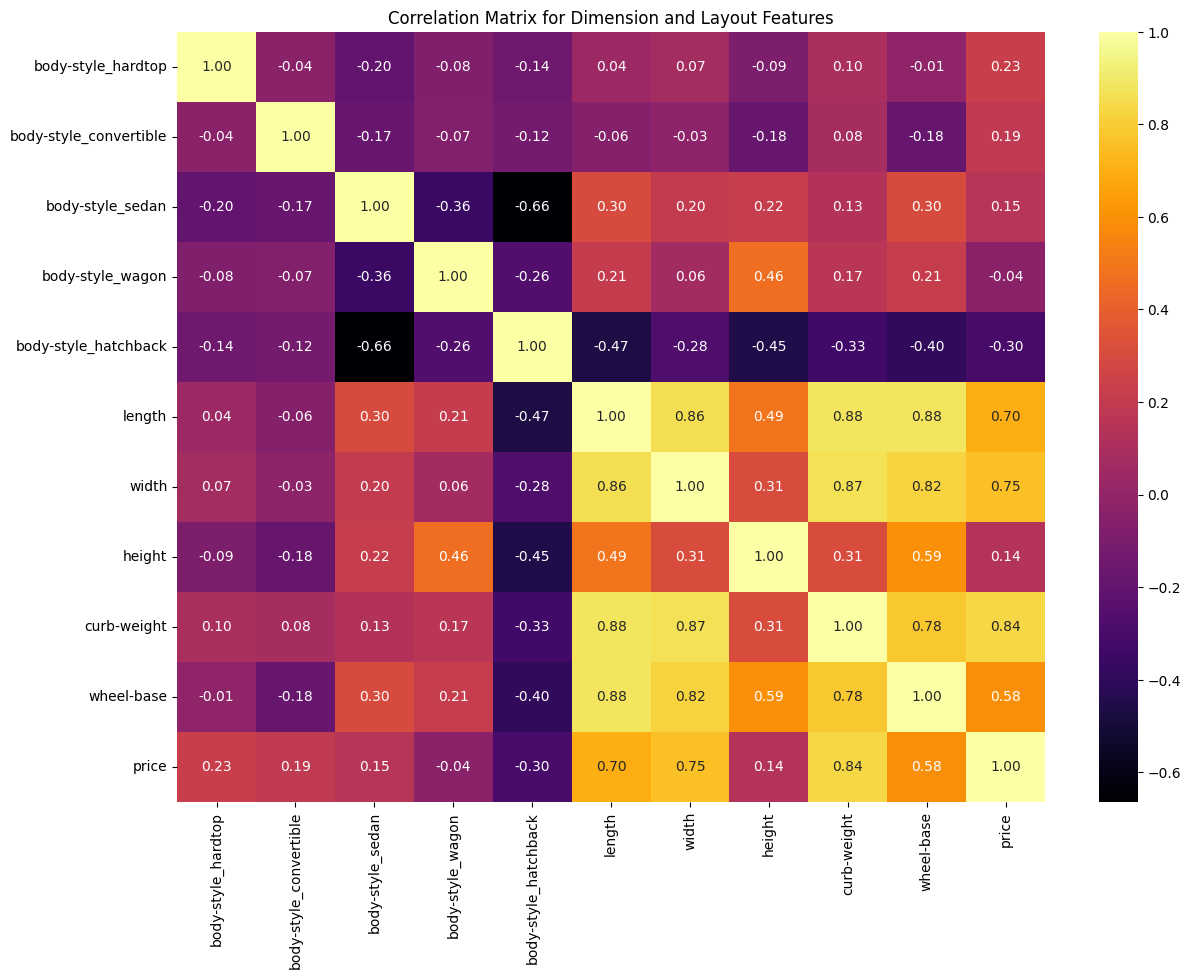

In [ ]:
# Correlation for dimensions and layout

dimension_layout_cols = [
    'body-style_hardtop',
    'body-style_convertible',
    'body-style_sedan',
    'body-style_wagon',
    'body-style_hatchback',
    'num-of-doors',
    'length',
    'width',
    'height',
    'curb-weight',
    'wheel-base',
    'price'
]

df_corr_dimension_layout = df_copy[dimension_layout_cols]

plt.figure(figsize=(14,10))

sns.heatmap(
    df_corr_dimension_layout.corr(numeric_only=True),
    annot=True,
    cmap='inferno',
    fmt='.2f',
)

plt.title('Correlation Matrix for Dimension and Layout Features')
plt.show()

### Breakdown of key features

C:\Users\User\AppData\Local\Temp\ipykernel_2992\3683788854.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


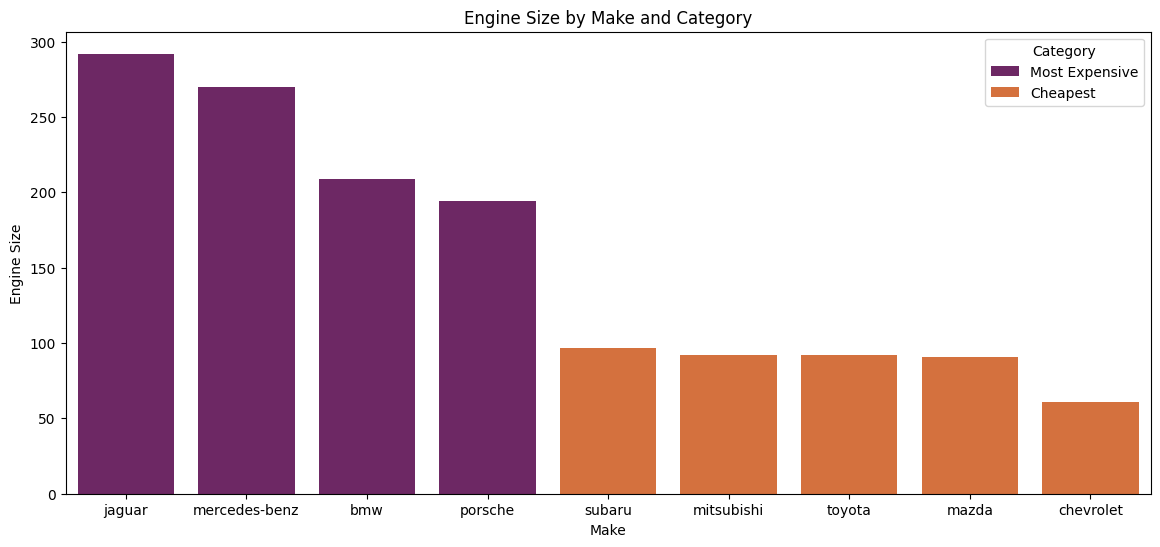

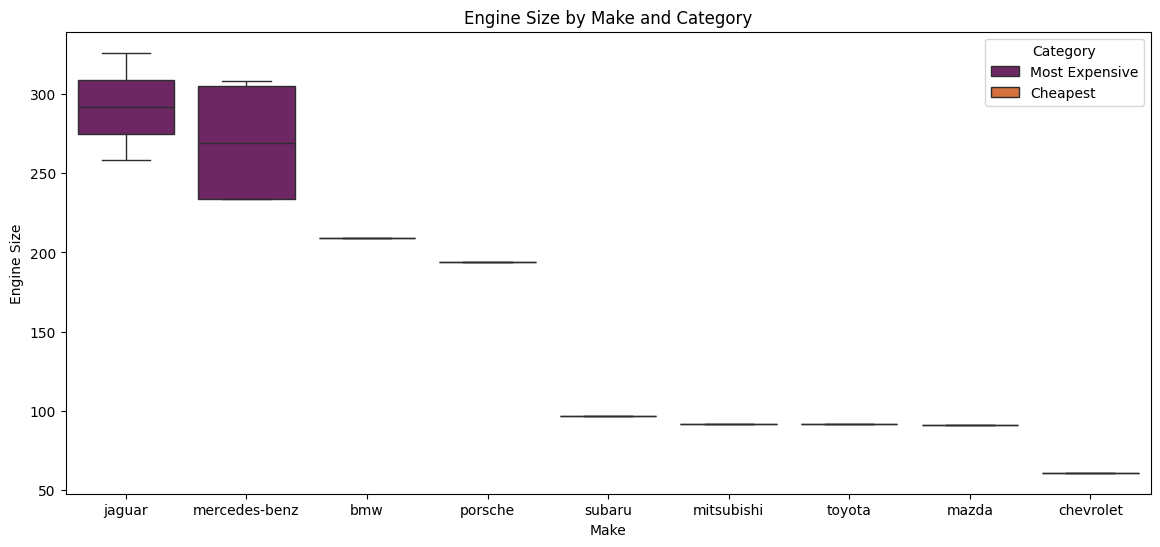

In [ ]:
# Order makes by average engine size
engine_size_order = combined_cars.groupby('make')['engine-size'].mean().sort_values(ascending=False).index

# Barplot of engine-size vs cheap and expensive cars
plt.figure(figsize=(14,6))
sns.barplot(
    x='make',
    y='engine-size',
    hue='Category',
    data=combined_cars,
    order=engine_size_order,
    palette='inferno',
    ci=None
)
plt.title('Engine Size by Make and Category')
plt.xlabel('Make')
plt.ylabel('Engine Size')
plt.legend(title='Category')
plt.show()

# Boxplot of engine-size vs cheap and expensive cars
plt.figure(figsize=(14,6))
sns.boxplot(
    x='make',
    y='engine-size',
    hue='Category',
    data=combined_cars,
    order=engine_size_order,
    palette='inferno',
)

plt.title('Engine Size by Make and Category')
plt.xlabel('Make')
plt.ylabel('Engine Size')
plt.legend(title='Category')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2992\3188690395.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


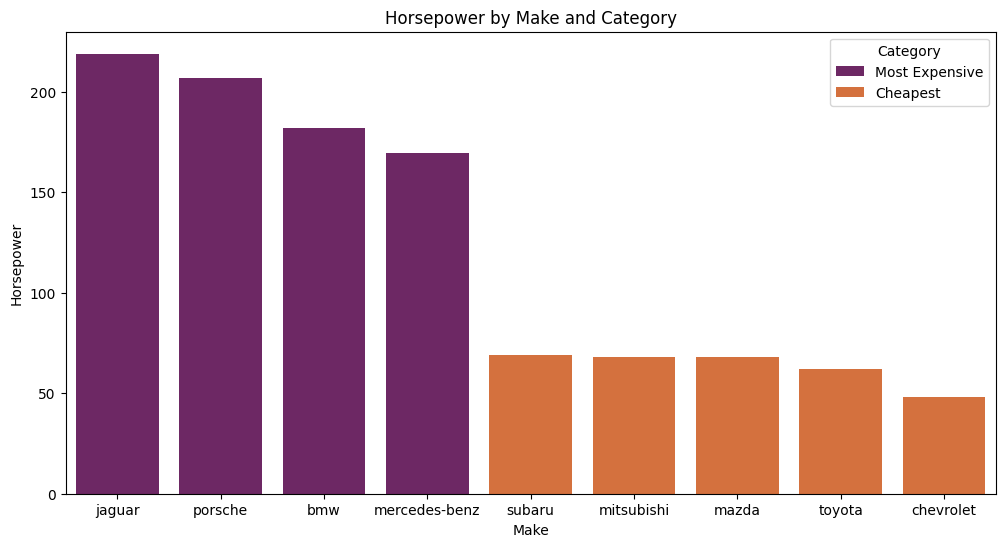

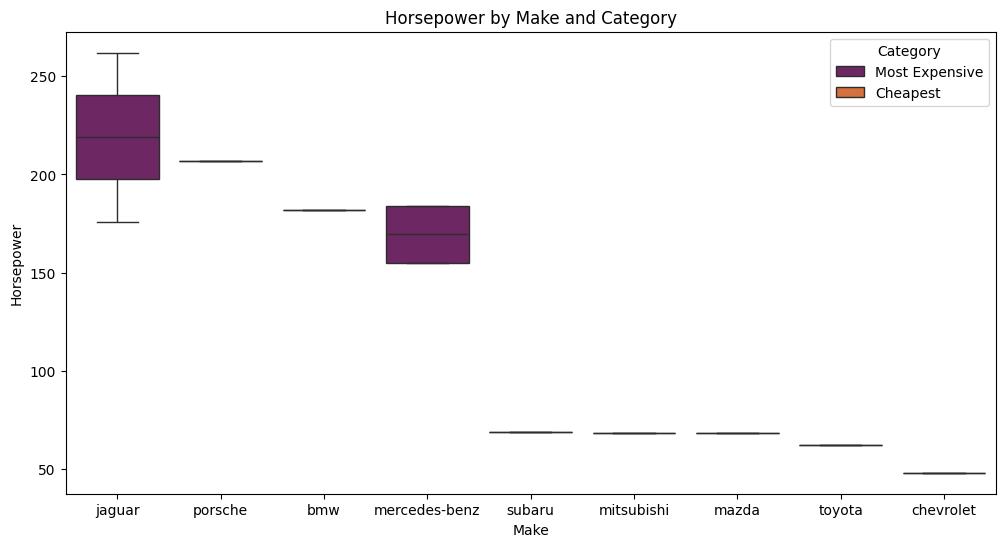

In [ ]:
# Order makes by average horsepower
horsepower_order = combined_cars.groupby('make')['horsepower'].mean().sort_values(ascending=False).index

# Barplot of horsepower vs cheap and expensive cars
plt.figure(figsize=(12,6))
sns.barplot(
    x='make',
    y='horsepower',
    hue='Category',
    palette='inferno',
    data=combined_cars,
    order=horsepower_order,
    ci=None
)

plt.title('Horsepower by Make and Category')
plt.xlabel('Make')
plt.ylabel('Horsepower')
plt.legend(title='Category')
plt.show()

# Boxplot of horsepower vs cheap and expensive cars
plt.figure(figsize=(12,6))
sns.boxplot(
    x='make',
    y='horsepower',
    hue='Category',
    data=combined_cars,
    order=horsepower_order,
    palette='inferno',
)
plt.title('Horsepower by Make and Category')
plt.xlabel('Make')
plt.ylabel('Horsepower')
plt.legend(title='Category')
plt.show()

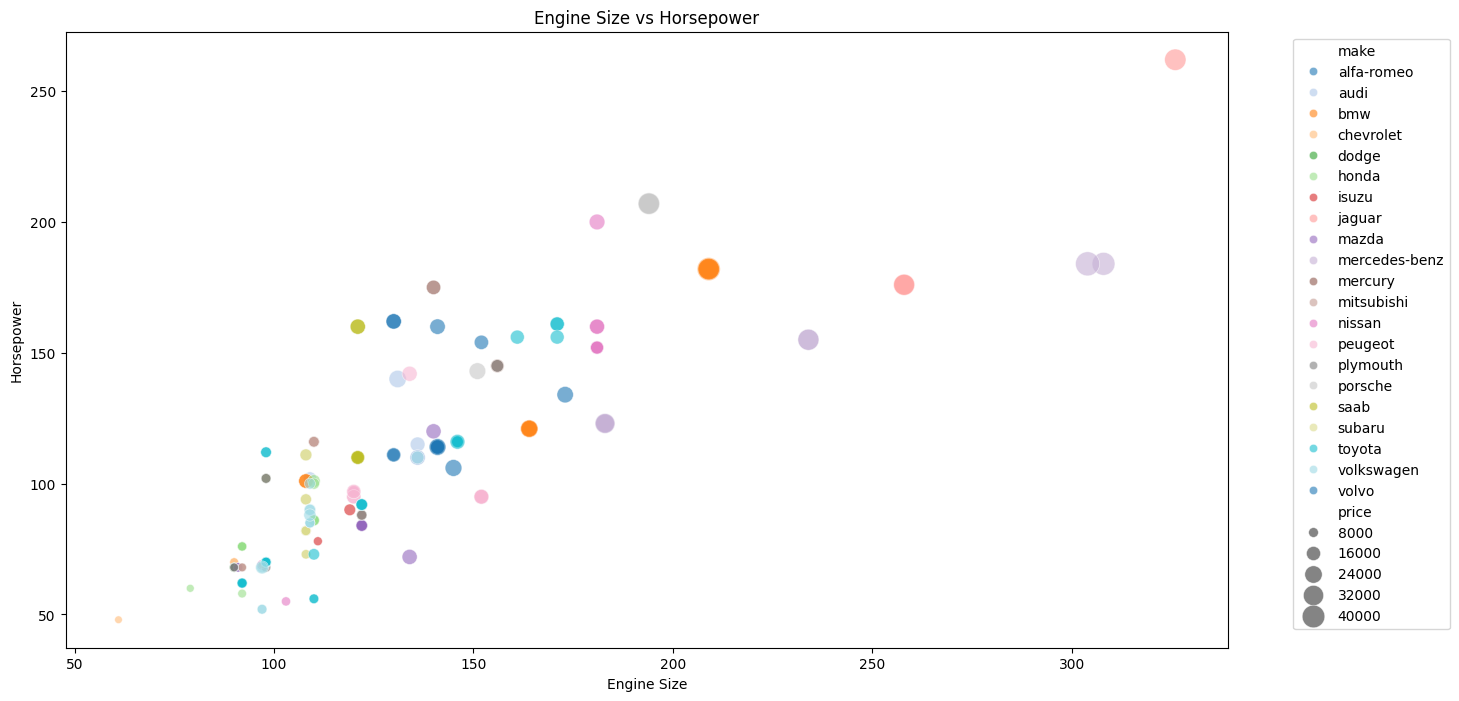

In [ ]:
# Sort by engine size column
sorted_eng_size = automobiles_df.sort_values(by='engine-size', ascending=False)

# Scatter Plot to show the relationship between horsepower and engine size
plt.figure(figsize=(15,8))
sns.scatterplot(
    x='engine-size',
    y='horsepower',
    data=automobiles_df,
    hue='make',
    palette='tab20',
    size='price',
    sizes=(30, 300),
    alpha=0.6
)

plt.title('Engine Size vs Horsepower')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2992\2773000296.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


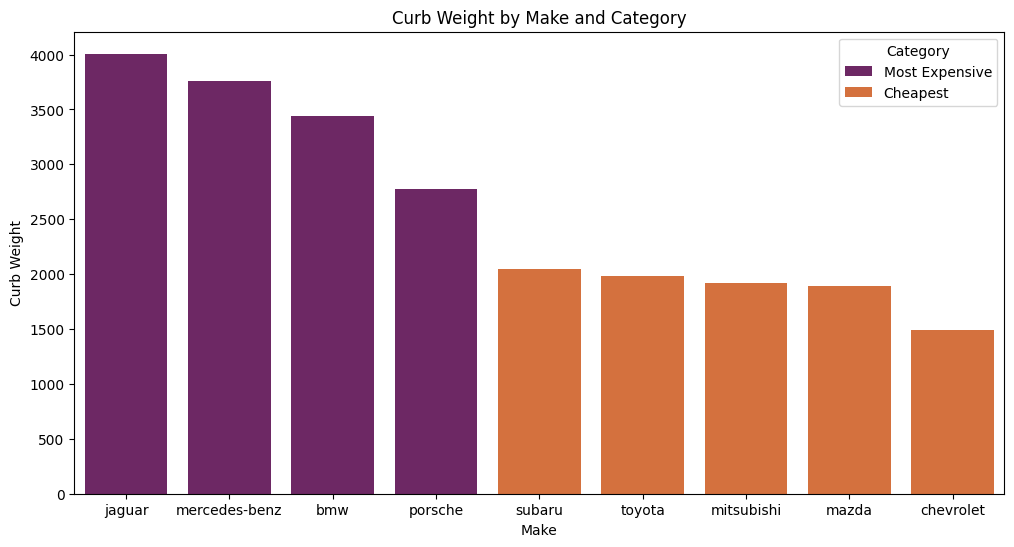

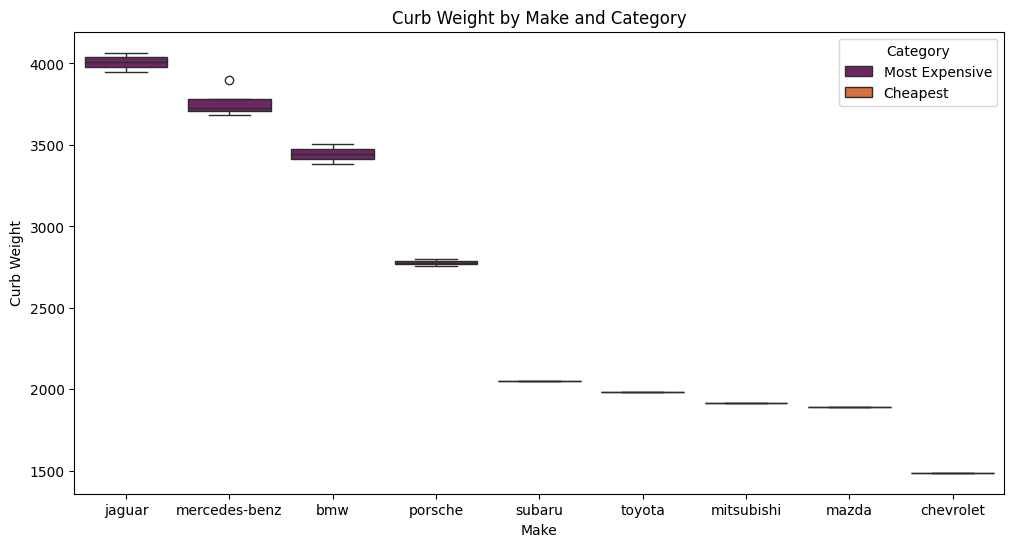

In [ ]:
# Order makes by average curb-weight
curb_weight_order = combined_cars.groupby('make')['curb-weight'].mean().sort_values(ascending=False).index

# Barplot of curb-weight vs cheap and expensive cars
plt.figure(figsize=(12,6))
sns.barplot(
    x='make',
    y='curb-weight',
    hue='Category',
    data=combined_cars,
    order=curb_weight_order,
    ci=None,
    palette='inferno',
)

plt.title('Curb Weight by Make and Category')
plt.xlabel('Make')
plt.ylabel('Curb Weight')
plt.legend(title='Category')
plt.show()

# Boxplot of curb-weight vs cheap and expensive cars
plt.figure(figsize=(12,6))
sns.boxplot(
    x='make',
    y='curb-weight',
    hue='Category',
    data=combined_cars,
    order=curb_weight_order,
    palette='inferno',
)
plt.title('Curb Weight by Make and Category')
plt.xlabel('Make')
plt.ylabel('Curb Weight')
plt.legend(title='Category')
plt.show()

#### Which manufacturer builds the most fuel efficient vehicles?

Compare the average mpg for each vehicle manufacture's vehicles and create a bar plot

C:\Users\User\AppData\Local\Temp\ipykernel_2992\821752146.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


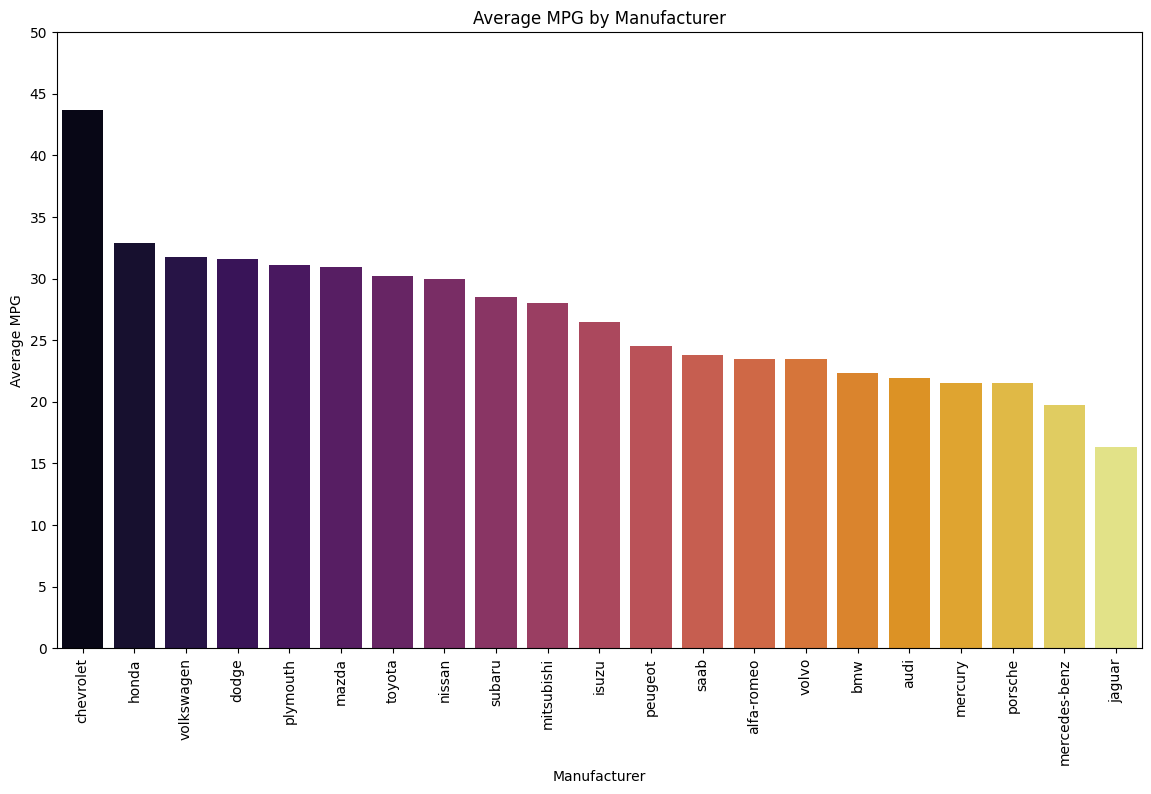

In [ ]:
# Calculate the average of city and highway mpg
automobiles_df['average-mpg'] = automobiles_df[['city-mpg', 'highway-mpg']].mean(axis=1)

# Get the average mpg for each manufacturer
average_mpg_by_manufacturer = automobiles_df.groupby('make')['average-mpg'].mean().reset_index()

# Sorted values
average_mpg_by_manufacturer = average_mpg_by_manufacturer.sort_values(by='average-mpg', ascending=False)

# Plot the barplot
plt.figure(figsize=(14,8))
sns.barplot(
    x='make',
    y='average-mpg',
    data=average_mpg_by_manufacturer,
    palette='inferno'
)

plt.title('Average MPG by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average MPG')
plt.yticks(np.arange(0, 55, 5))   # steps of 5
plt.xticks(rotation=90)
plt.show()

#### Which vehicles have the largest engine capacity.
Sort the dataframe based on the engine-size column.

C:\Users\User\AppData\Local\Temp\ipykernel_2992\2667369131.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_2992\2667369131.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


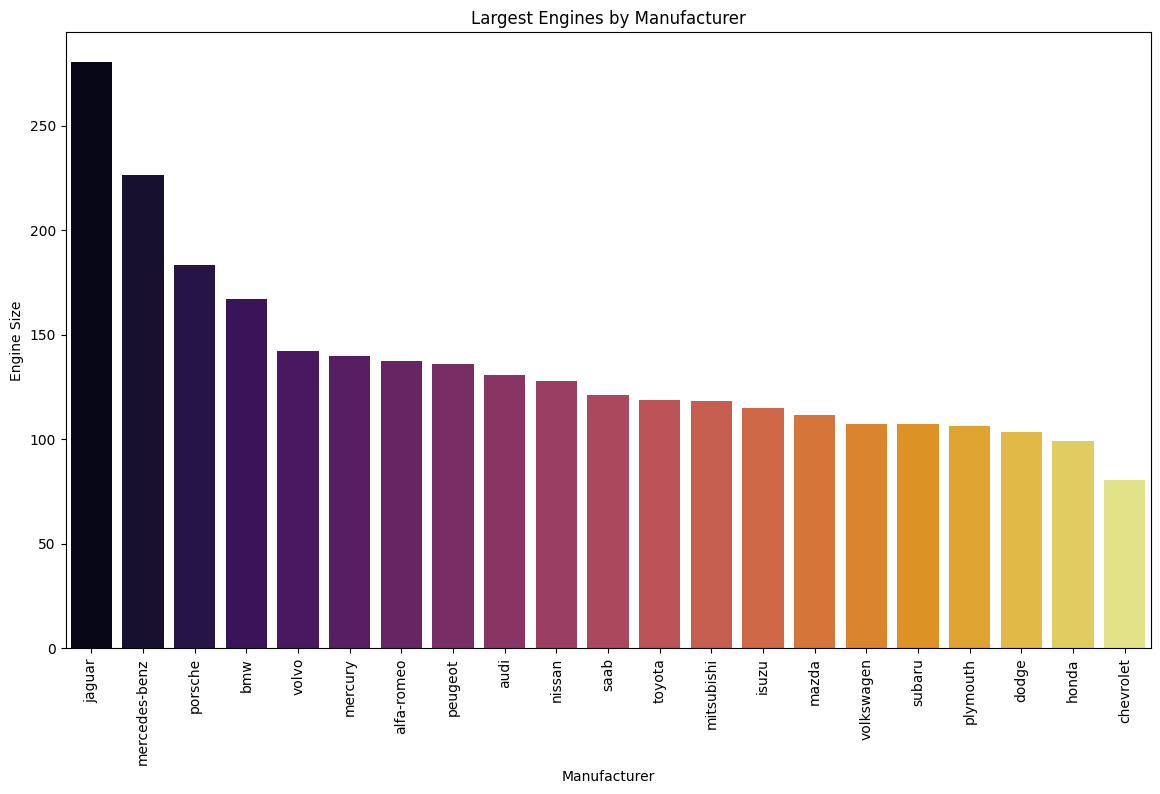

In [ ]:
# Sort by engine size column
sorted_eng_size = automobiles_df.groupby('make')['engine-size'].mean().sort_values(ascending=False).reset_index()

# Plot barplot
plt.figure(figsize=(14,8))

sns.barplot(
    x='make',
    y='engine-size',
    data=sorted_eng_size,
    palette='inferno',
    ci=None
)

plt.title('Largest Engines by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Engine Size')
plt.xticks(rotation=90)
plt.show()

#### Which vehicle manufacturer has the most car models in the dataset

C:\Users\User\AppData\Local\Temp\ipykernel_2992\547026023.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_2992\547026023.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


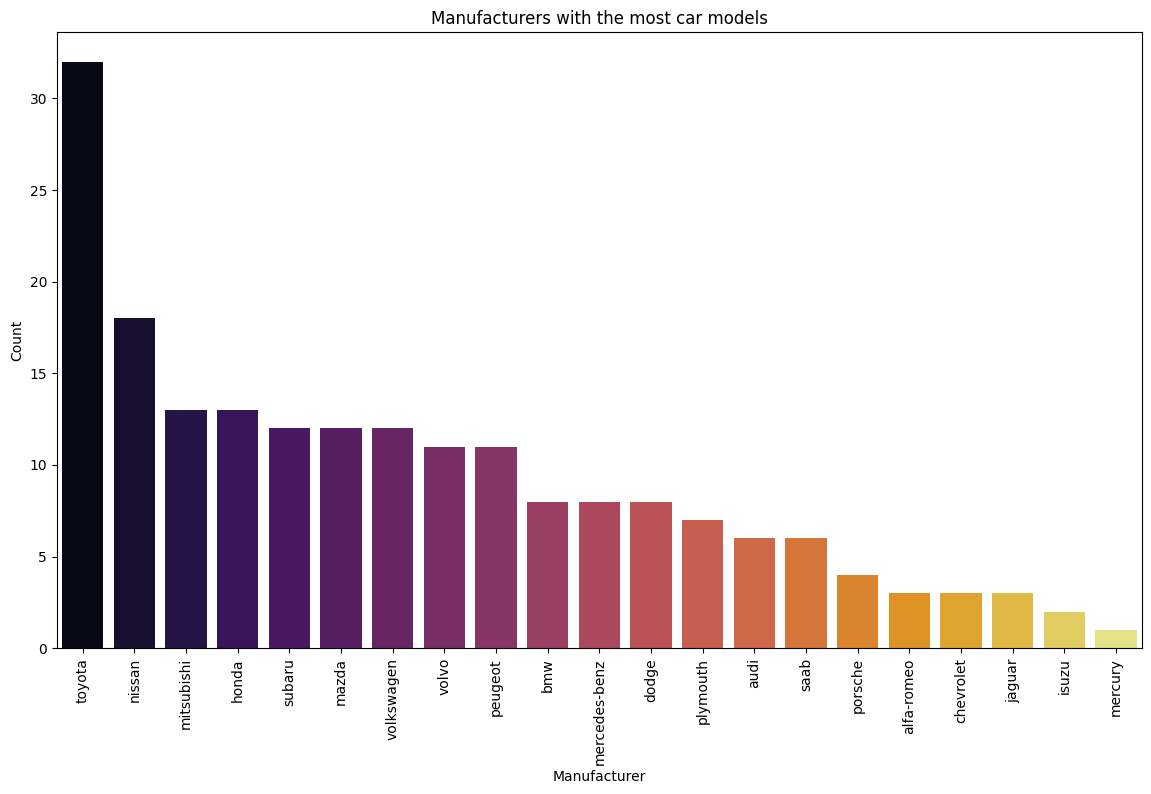

In [ ]:
# Create count of cars by manufacturer
count = automobiles_df['make'].value_counts().reset_index()
count.columns = ['Manufacturer', 'Count']

# Plot barplot 
plt.figure(figsize=(14,8))

sns.barplot(
    x='Manufacturer',
    y='Count',
    data=count,
    palette='inferno',
    ci=None
)

plt.title('Manufacturers with the most car models')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


